In this project, I'm going to analyse some tech stocks and think about which company I'd like to join (on an enormous salary that includes stock options, of course).

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

Portfolio: Netflix, Facebook, Twitter, Oracle, Tesla, Twilio

In [3]:
symbols = ['NFLX', 'FB', 'TWTR', 'ORCL', 'TSLA', 'TWLO']
import DateTime as datetime
start_date = '2020-05-01'
end_date = '2021-05-01'
stock_data = web.get_data_yahoo(symbols,start_date,end_date)
stock_data.head()

Attributes   Adj Close                                                        \
Symbols           NFLX          FB   TWTR       ORCL        TSLA        TWLO   
Date                                                                           
2020-05-01  415.269989  202.270004  27.84  50.947754  140.264008  107.980003   
2020-05-04  428.149994  205.259995  28.23  50.908405  152.238007  113.250000   
2020-05-05  424.679993  207.070007  28.07  51.203526  153.641998  116.570000   
2020-05-06  434.260010  208.470001  27.68  51.016617  156.516006  122.400002   
2020-05-07  436.529999  211.259995  28.77  51.744583  156.007996  170.889999   

Attributes       Close                                ...   Open             \
Symbols           NFLX          FB   TWTR       ORCL  ...   TWTR       ORCL   
Date                                                  ...                     
2020-05-01  415.269989  202.270004  27.84  51.790001  ...  28.00  52.380001   
2020-05-04  428.149994  205.259995  28.23  51.750000  ...  27.60  51.709999   
2020-05-05  424.679993  207.070007  28.07  52.049999  ...  28.67  52.220001   
2020-05-06  434.260010  208.470001  27.68  51.860001  ...  28.35  52.430000   
2020-05-07  436.529999  211.259995  28.77  52.599998  ...  28.08  52.400002   

Attributes                             Volume                          \
Symbols           TSLA        TWLO       NFLX          FB        TWTR   
Date                                                                    
2020-05-01  151.000000  109.389999  8299900.0  30415600.0  28231100.0   
2020-05-04  140.199997  106.980003  7799100.0  19250700.0  17846300.0   
2020-05-05  157.957993  115.279999  6286300.0  21071200.0  19221900.0   
2020-05-06  155.300003  117.050003  6660700.0  21857000.0  15531000.0   
2020-05-07  155.442001  152.399994  5641900.0  15152000.0  16190500.0   

Attributes                                      
Symbols          ORCL         TSLA        TWLO  
Date                                            
2020-05-01  8702400.0  162659000.0   2693500.0  
2020-05-04  7567900.0   96185500.0   2425200.0  
2020-05-05  7271800.0   84958500.0   2584700.0  
2020-05-06  7050000.0   55616000.0   5990500.0  
2020-05-07  7154700.0   57638500.0  31103100.0  

[5 rows x 36 columns]

In [4]:
stock_data['Adj Close'].head()

Symbols,NFLX,FB,TWTR,ORCL,TSLA,TWLO
Date,,,,,,
2020-05-01,415.269989,202.270004,27.84,50.947754,140.264008,107.980003
2020-05-04,428.149994,205.259995,28.23,50.908405,152.238007,113.250000
2020-05-05,424.679993,207.070007,28.07,51.203526,153.641998,116.570000
2020-05-06,434.260010,208.470001,27.68,51.016617,156.516006,122.400002
2020-05-07,436.529999,211.259995,28.77,51.744583,156.007996,170.889999


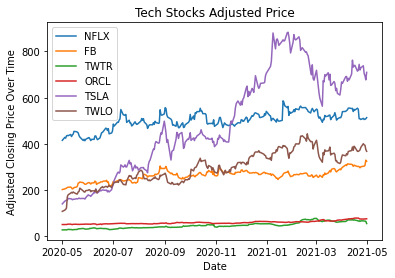

In [5]:
plt.plot(stock_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price Over Time')
plt.title('Tech Stocks Adjusted Price')
plt.legend(symbols)
plt.show()

<AxesSubplot:xlabel='Date'>

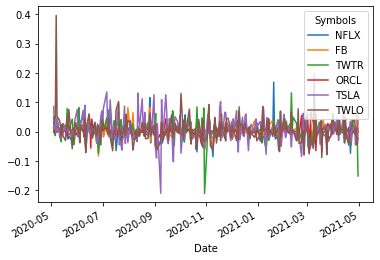

In [7]:
daily_return = stock_data['Adj Close'].pct_change()
daily_return.plot()

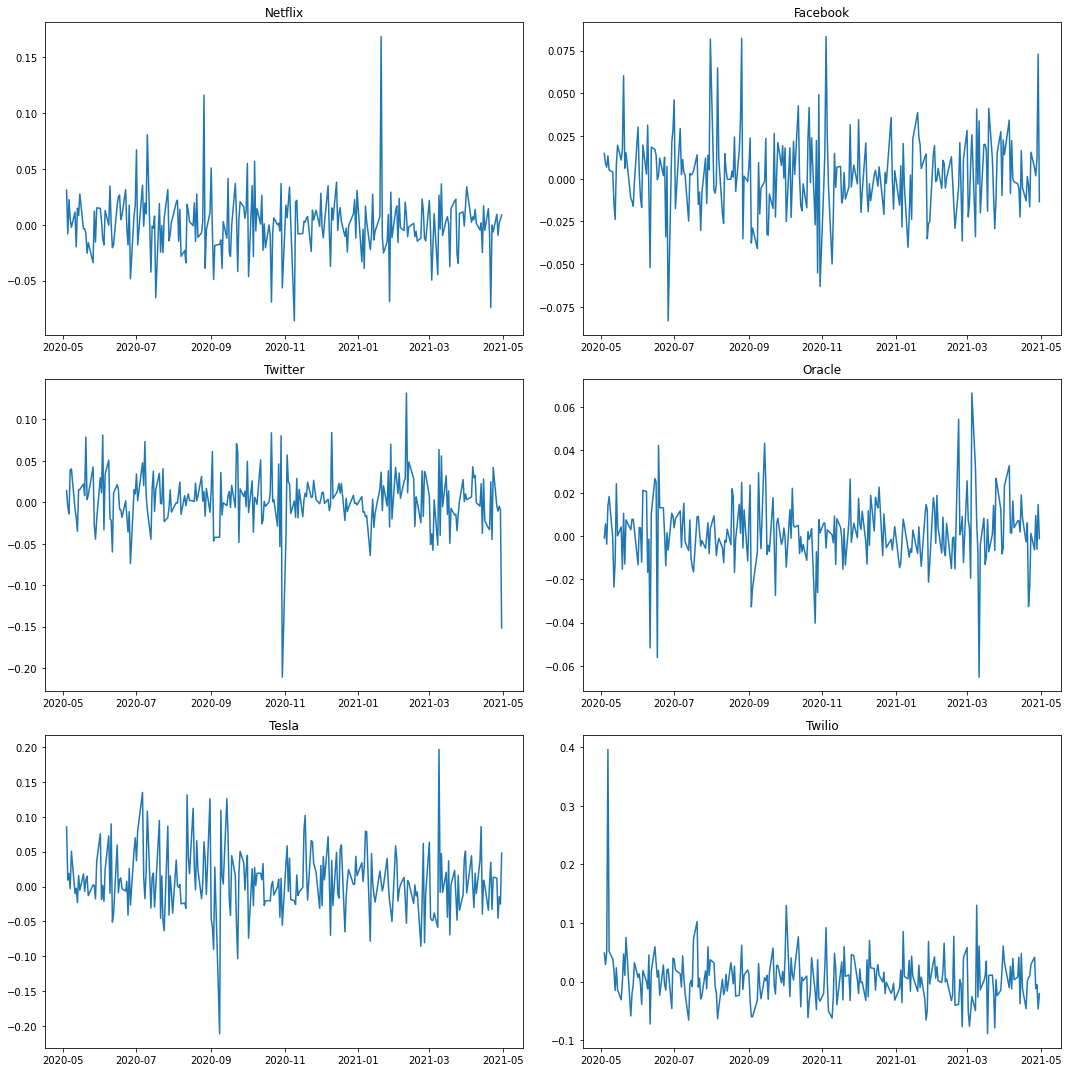

In [20]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.plot(stock_data['Adj Close']['NFLX'].pct_change())
ax1.set_title('Netflix')

ax2.plot(stock_data['Adj Close']['FB'].pct_change())
ax2.set_title('Facebook')

ax3.plot(stock_data['Adj Close']['TWTR'].pct_change())
ax3.set_title('Twitter')

ax4.plot(stock_data['Adj Close']['ORCL'].pct_change())
ax4.set_title('Oracle')

ax5.plot(stock_data['Adj Close']['TSLA'].pct_change())
ax5.set_title('Tesla')

ax6.plot(stock_data['Adj Close']['TWLO'].pct_change())
ax6.set_title('Twilio')

plt.tight_layout()

plt.show()

Now I will calculate the mean daily rate of return.

In [22]:
mean_daily_return = daily_return.mean()
mean_daily_return.keys()

Index(['NFLX', 'FB', 'TWTR', 'ORCL', 'TSLA', 'TWLO'], dtype='object', name='Symbols')

In [27]:
height = []
for k in mean_daily_return.keys():
    height.append(mean_daily_return[k])
height

[0.001195333198889525,
 0.002155944404392323,
 0.003320884484088864,
 0.0016973917760541002,
 0.0075239301327236245,
 0.005782791395126257]

In [28]:
x_pos = np.arange(len(mean_daily_return.keys()))
x_pos

array([0, 1, 2, 3, 4, 5])

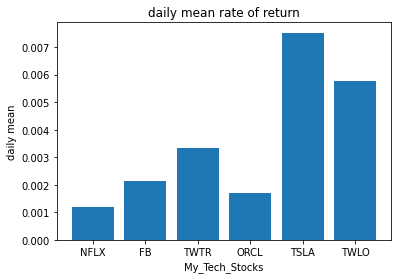

In [31]:
plt.bar(x_pos, height)
plt.xticks(x_pos, mean_daily_return.keys())

plt.xlabel("My_Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

plt.show()

Tesla has the highest average daily rate of return.

Now I will calculate the variance of these stocks.

In [33]:
var_return = daily_return.var()
var_return.keys()

Index(['NFLX', 'FB', 'TWTR', 'ORCL', 'TSLA', 'TWLO'], dtype='object', name='Symbols')

In [34]:
height = []
for k in var_return.keys():
    height.append(var_return[k])
height

[0.0007119256891029198,
 0.0005326213387589552,
 0.0011532367883490954,
 0.00022836352508430637,
 0.002113858575977973,
 0.0019185738950137324]

In [35]:
x_pos = np.arange(len(var_return.keys()))
x_pos

array([0, 1, 2, 3, 4, 5])

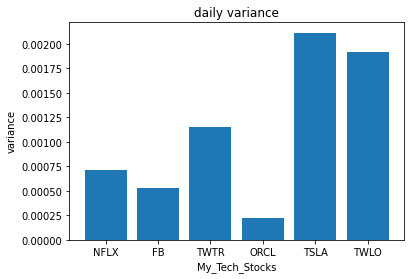

In [36]:
plt.bar(x_pos, height)
plt.xticks(x_pos, var_return.keys())

plt.xlabel("My_Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

plt.show()

Hm… quite a lot of variance in Tesla's stock price.

Now I will calculate the standard deviation.

In [37]:
std_return = daily_return.std()
std_return.keys()

Index(['NFLX', 'FB', 'TWTR', 'ORCL', 'TSLA', 'TWLO'], dtype='object', name='Symbols')

In [38]:
height = []
for k in std_return.keys():
    height.append(std_return[k])
height

[0.02668193563261331,
 0.023078590484666848,
 0.03395934022252339,
 0.015111701594602322,
 0.0459767177599486,
 0.043801528455223254]

In [40]:
x_pos = np.arange(len(std_return.keys()))
x_pos

array([0, 1, 2, 3, 4, 5])

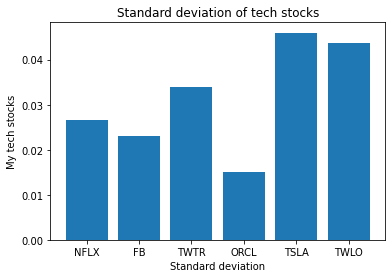

In [41]:
plt.bar(x_pos,height)
plt.xticks(x_pos, std_return.keys())
plt.xlabel('Standard deviation')
plt.ylabel('My tech stocks')
plt.title('Standard deviation of tech stocks')
plt.show()

Tesla still not looking great here, bit volatile… but they all kind of are.

Lastly, I will calculate the correlation between these stocks in case I win the lottery and become a full time money manager.

In [42]:
correlation = daily_return.corr()
correlation

Symbols,NFLX,FB,TWTR,ORCL,TSLA,TWLO
Symbols,,,,,,
NFLX,1.000000,0.507356,0.257910,0.169871,0.354791,0.268962
FB,0.507356,1.000000,0.479143,0.255298,0.323404,0.237066
TWTR,0.257910,0.479143,1.000000,0.132945,0.220815,0.289970
ORCL,0.169871,0.255298,0.132945,1.000000,0.144074,0.063928
TSLA,0.354791,0.323404,0.220815,0.144074,1.000000,0.290778
TWLO,0.268962,0.237066,0.289970,0.063928,0.290778,1.000000


None of the stocks are negatively correlated. Tesla and Oracle are the least correlated at 0.14, while Netflix and Facebook are the most highly correlated at 0.51.